<a target="_blank" href="https://colab.research.google.com/github/IngCarlaPezzone/tensorflow-1-public/blob/main/C2/W1/assignment/C2W1_Assignment_traducida_resuelta.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Semana 1: Uso de CNN con el conjunto de datos Cats vs Dogs

Bienvenido a la primera tarea del curso. Esta semana, utilizarás el famoso conjunto de datos `Gatos vs Perros` para entrenar un modelo que pueda clasificar imágenes de perros de imágenes de gatos. Para ello, crearás tu propia red neuronal convolucional en Tensorflow y aprovecharás las utilidades de preprocesamiento de imágenes de Keras.

También crearás algunas funciones de ayuda para mover las imágenes por el sistema de archivos, así que si no estás familiarizado con el módulo `os` asegúrate de echar un vistazo a los [docs](https://docs.python.org/3/library/os.html).

¡Empecemos!

<details><summary>Texto Original</summary>

# Week 1: Using CNN's with the Cats vs Dogs Dataset

Welcome to the 1st assignment of the course! This week, you will be using the famous `Cats vs Dogs` dataset to train a model that can classify images of dogs from images of cats. For this, you will create your own Convolutional Neural Network in Tensorflow and leverage Keras' image preprocessing utilities.

You will also create some helper functions to move the images around the filesystem so if you are not familiar with the `os` module be sure to take a look a the [docs](https://docs.python.org/3/library/os.html).

Let's get started!

In [1]:
# Instale este paquete para utilizar la GPU de Colab para la formación
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.4.1.50-1+cuda11.6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [2]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

Descargue el conjunto de datos desde su fuente original ejecutando la celda que aparece a continuación. 

Tenga en cuenta que el archivo `zip` que contiene las imágenes se descomprime en el directorio `/tmp`.

<details><summary>Texto Original</summary>

Download the dataset from its original source by running the cell below. 

Note that the `zip` file that contains the images is unzipped under the `/tmp` directory.

In [3]:
# Si la URL no funciona, visite https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# Y haz clic con el botón derecho del ratón en el enlace "Descargar manualmente" para obtener 
# una nueva URL del conjunto de datos

# Nota: Este conjunto de datos es muy grande y tardará en descargarse

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-10-31 22:08:26--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.85.5.10, 2a02:26f0:b200:3ba::317f, 2a02:26f0:b200:39b::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.85.5.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   276MB/s    in 2.9s    

2022-10-31 22:08:28 (276 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



Ahora las imágenes se almacenan en el directorio `/tmp/PetImages`. Hay un subdirectorio para cada clase, así que uno para perros y otro para gatos.

<details><summary>Texto Original</summary>

Now the images are stored within the `/tmp/PetImages` directory. There is a subdirectory for each class, so one for dogs and one for cats.

In [4]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Elimina todos los archivos que no son de imagen (hay dos archivos .db incluidos en el conjunto de datos)
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir devuelve una lista que contiene todos los archivos bajo la ruta dada
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


**Expected Output:**

```
There are 12501 images of dogs.
There are 12501 images of cats.
```

Necesitará un directorio para cats-v-dogs, y subdirectorios para el entrenamiento
y la validación. Estos, a su vez, necesitarán subdirectorios para `gatos' y `perros'. Para lograr esto, complete el `create_train_val_dirs` a continuación:

<details><summary>Texto Original</summary>

You will need a directory for cats-v-dogs, and subdirectories for training
and validation. These in turn will need subdirectories for 'cats' and 'dogs'. To accomplish this, complete the `create_train_val_dirs` below:

In [6]:
# Definir el directorio raíz
root_dir = '/tmp/cats-v-dogs'

# Directorio vacío para evitar FileExistsError si la función se ejecuta varias veces
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: crear_dirigir_valores_de_entrenamiento
def create_train_val_dirs(root_path):
    """
    Creates directories for the train and test sets

    Args:
      root_path (string) - the base directory path to create subdirectories from

    Returns:
      None
    """  
    ### START CODE HERE

    # HINT:
    # Utilice os.makedirs para crear sus directorios con subdirectorios intermedios
    # No codifique las rutas. Utilice os.path.join para añadir los nuevos directorios al parámetro root_path

    os.mkdir(root_path)
    os.mkdir(root_path + '/training')
    os.mkdir(root_path + '/validation')
    os.mkdir(root_path + '/training/cats')
    os.mkdir(root_path + '/training/dogs')
    os.mkdir(root_path + '/validation/cats')
    os.mkdir(root_path + '/validation/dogs')

    ### END CODE HERE

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [7]:
# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/validation/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs


**Expected Output (directory order might vary):**

``` txt
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/validation/dogs

```

Codifique la función `split_data` que recibe los siguientes argumentos:
- SOURCE_DIR: directorio que contiene los archivos

- TRAINING_DIR: directorio en el que se copiará una parte de los archivos (se utilizará para el entrenamiento)
- VALIDATION_DIR: directorio en el que se copiará una parte de los archivos (se utilizará para la validación)
- SPLIT_SIZE: determina la porción de imágenes utilizadas para el entrenamiento.

Los archivos deben ser aleatorios, de modo que el conjunto de entrenamiento sea una muestra aleatoria de los archivos, y el conjunto de validación esté formado por los archivos restantes.

Por ejemplo, si `SOURCE_DIR` es `PetImages/Cat`, y `SPLIT_SIZE` es .9 entonces el 90% de las imágenes de `PetImages/Cat` se copiarán en el directorio `TRAINING_DIR
y el 10% de las imágenes se copiarán en el directorio `VALIDATION_DIR`.

Todas las imágenes deben ser comprobadas antes de la copia, por lo que si tienen una longitud de archivo cero, serán omitidas del proceso de copia. Si este es el caso, su función debería imprimir un mensaje como `"el nombre del archivo tiene longitud cero, por lo que se ignora". **Debería realizar esta comprobación antes de la división para que sólo se tengan en cuenta las imágenes que no sean cero cuando se realice la división real.


Sugerencias:

- `os.listdir(DIRECTORY)` devuelve una lista con el contenido de ese directorio.

- `os.path.getsize(PATH)` devuelve el tamaño del archivo

- `copyfile(origen, destino)` copia un fichero del origen al destino

- `random.sample(list, len(list))` baraja una lista

<details><summary>Texto Original</summary>

Code the `split_data` function which takes in the following arguments:
- SOURCE_DIR: directory containing the files

- TRAINING_DIR: directory that a portion of the files will be copied to (will be used for training)
- VALIDATION_DIR: directory that a portion of the files will be copied to (will be used for validation)
- SPLIT_SIZE: determines the portion of images used for training.

The files should be randomized, so that the training set is a random sample of the files, and the validation set is made up of the remaining files.

For example, if `SOURCE_DIR` is `PetImages/Cat`, and `SPLIT_SIZE` is .9 then 90% of the images in `PetImages/Cat` will be copied to the `TRAINING_DIR` directory
and 10% of the images will be copied to the `VALIDATION_DIR` directory.

All images should be checked before the copy, so if they have a zero file length, they will be omitted from the copying process. If this is the case then your function should print out a message such as `"filename is zero length, so ignoring."`. **You should perform this check before the split so that only non-zero images are considered when doing the actual split.**


Hints:

- `os.listdir(DIRECTORY)` returns a list with the contents of that directory.

- `os.path.getsize(PATH)` returns the size of the file

- `copyfile(source, destination)` copies a file from source to destination

- `random.sample(list, len(list))` shuffles a list

In [8]:
# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  ### START CODE HERE
  files=[]
  
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print('File is empty')

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    
    shuffled_set = random.sample(files, len(files))
    
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
  
  for filename in training_set:
    src_file = SOURCE_DIR + filename
    dest_file = TRAINING_DIR + filename
    copyfile(src_file, dest_file)
    
  for filename in testing_set:
    src_file = SOURCE_DIR + filename
    dest_file = VALIDATION_DIR + filename
    copyfile(src_file, dest_file)

  ### END CODE HERE


In [9]:
# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
    for file in os.scandir(TRAINING_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
    for file in os.scandir(TRAINING_DOGS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
    for file in os.scandir(VALIDATION_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
    for file in os.scandir(VALIDATION_DOGS_DIR):
        os.remove(file.path)

# Definir la proporción de imágenes utilizadas para el entrenamiento
split_size = .9

# Ejecute la función
# NOTA: Los mensajes sobre las imágenes de longitud cero deben imprimirse
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Comprueba que el número de imágenes coincide con la salida esperada

# Su función debe realizar copias en lugar de mover las imágenes, por lo que los 
# directorios originales deben contener imágenes sin cambios
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

File is empty
File is empty


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


**Expected Output:**

```
666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation
```

Ahora que has organizado con éxito los datos de una manera que puede ser fácilmente alimentada por el `ImageDataGenerator` de Keras, es el momento de codificar los generadores que producirán lotes de imágenes, tanto para el entrenamiento como para la validación. Para ello, completa la función `train_val_generators` de abajo.

Algo importante a tener en cuenta es que las imágenes de este conjunto de datos vienen en una variedad de resoluciones. Por suerte, el método `flow_from_directory` te permite estandarizar esto definiendo una tupla llamada `target_size` que se utilizará para convertir cada imagen a esta resolución objetivo. **Para este ejercicio, utiliza un "target_size" de (150, 150)**.

**Consejo:** 

No utilices el aumento de datos estableciendo parámetros extra cuando instales la clase `ImageDataGenerator`. Esto hará que el entrenamiento de tu modelo tarde más tiempo en alcanzar el umbral de precisión necesario para aprobar esta tarea y este tema se tratará en la próxima semana.

<details><summary>Texto Original</summary>

Now that you have successfully organized the data in a way that can be easily fed to Keras' `ImageDataGenerator`, it is time for you to code the generators that will yield batches of images, both for training and validation. For this, complete the `train_val_generators` function below.

Something important to note is that the images in this dataset come in a variety of resolutions. Luckily, the `flow_from_directory` method allows you to standarize this by defining a tuple called `target_size` that will be used to convert each image to this target resolution. **For this exercise, use a `target_size` of (150, 150)**.

**Hint:** 

Don't use data augmentation by setting extra parameters when you instantiate the `ImageDataGenerator` class. This will make the training of your model to take longer to reach the necessary accuracy threshold to pass this assignment and this topic will be covered in the next week.

In [10]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instancie la clase ImageDataGenerator (no olvide establecer el argumento rescale)
  train_datagen = ImageDataGenerator( rescale = 1.0/255.0 )

  # Pasar los argumentos adecuados al método flow_from_directory
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=100,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instancie la clase ImageDataGenerator (no olvide establecer el argumento rescale)
  validation_datagen = ImageDataGenerator( rescale = 1.0/255.0 )

  # Pasar los argumentos adecuados al método flow_from_directory
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator


In [11]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


**Expected Output:**

```
Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
```


Un último paso antes del entrenamiento es definir la arquitectura del modelo que será entrenado.

Completa la función `create_model` que aparece a continuación y que debería devolver un modelo `Secuencial` de Keras.

Además de definir la arquitectura del modelo, también debes compilarlo, así que asegúrate de usar una función `loss` que sea compatible con el `class_mode` que definiste en el ejercicio anterior, que también debería ser compatible con la salida de tu red. Puedes saber si no son compatibles si obtienes un error durante el entrenamiento.

**Ten en cuenta que debes utilizar al menos 3 capas de convolución para conseguir el rendimiento deseado.**


<details><summary>Texto Original</summary>

One last step before training is to define the architecture of the model that will be trained.

Complete the `create_model` function below which should return a Keras' `Sequential` model.

Aside from defining the architecture of the model, you should also compile it so make sure to use a `loss` function that is compatible with the `class_mode` you defined in the previous exercise, which should also be compatible with the output of your network. You can tell if they aren't compatible if you get an error during training.

**Note that you should use at least 3 convolution layers to achieve the desired performance.**

In [12]:
# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), 
    
    tf.keras.layers.Dense(512, activation='relu'), 
    
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model


¡Ahora es el momento de entrenar su modelo!

**Nota:** Puede ignorar las advertencias `UserWarning: Posiblemente datos EXIF corruptos.`.

<details><summary>Texto Original</summary>

Now it is time to train your model!

**Note:** You can ignore the `UserWarning: Possibly corrupt EXIF data.` warnings.

In [13]:
# Obtener el modelo no entrenado
model = create_model()

# Entrenar el modelo
# Tenga en cuenta que esto puede llevar algún tiempo.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/15
188/225 [========================>.....] - ETA: 11s - loss: 0.8404 - accuracy: 0.6082

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

225/225 [==============================] - 80s 333ms/step - loss: 0.8032 - accuracy: 0.6190 - val_loss: 0.5799 - val_accuracy: 0.6992
Epoch 2/15
225/225 [==============================] - 72s 321ms/step - loss: 0.5437 - accuracy: 0.7275 - val_loss: 0.5197 - val_accuracy: 0.7344
Epoch 3/15
225/225 [==============================] - 73s 326ms/step - loss: 0.4618 - accuracy: 0.7799 - val_loss: 0.4887 - val_accuracy: 0.7560
Epoch 4/15
225/225 [==============================] - 72s 319ms/step - loss: 0.3942 - accuracy: 0.8219 - val_loss: 0.4096 - val_accuracy: 0.8068
Epoch 5/15
225/225 [==============================] - 72s 322ms/step - loss: 0.3278 - accuracy: 0.8567 - val_loss: 0.4434 - val_accuracy: 0.7908
Epoch 6/15
225/225 [==============================] - 73s 323ms/step - loss: 0.2556 - accuracy: 0.8944 - val_loss: 0.5043 - val_accuracy: 0.7988
Epoch 7/15
225/225 [==============================] - 72s 319ms/step - loss: 0.1825 - accuracy: 0.9261 - val_loss: 0.4706 - val_accuracy: 0.8

Una vez finalizado el entrenamiento, puede ejecutar la siguiente celda para comprobar la precisión de entrenamiento y validación alcanzada al final de cada época.

**Para aprobar esta tarea, tu modelo debe alcanzar una precisión de entrenamiento de al menos el 95% y una precisión de validación de al menos el 80%**. Si tu modelo no alcanza estos umbrales, intenta entrenar de nuevo con una arquitectura de modelo diferente y recuerda utilizar al menos 3 capas convolucionales.

<details><summary>Texto Original</summary>

Once training has finished, you can run the following cell to check the training and validation accuracy achieved at the end of each epoch.

**To pass this assignment, your model should achieve a training accuracy of at least 95% and a validation accuracy of at least 80%**. If your model didn't achieve these thresholds, try training again with a different model architecture and remember to use at least 3 convolutional layers.

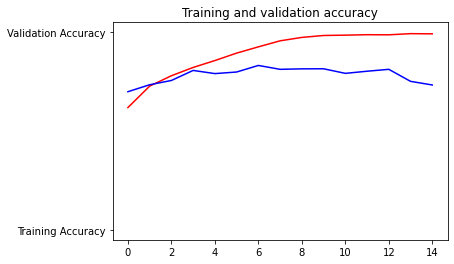

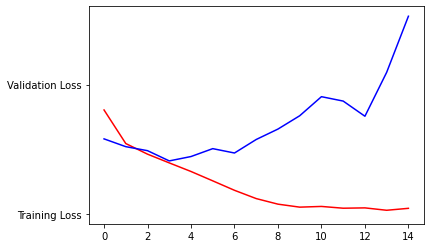

In [14]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista en los datos de entrenamiento y de prueba
# conjuntos para cada época de entrenamiento
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Trazar la precisión de entrenamiento y validación por época
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Trazar la pérdida de entrenamiento y validación por época
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

Es probable que encuentre que el modelo está sobreajustado, lo que significa que está haciendo un gran trabajo en la clasificación de las imágenes en el conjunto de entrenamiento, pero tiene dificultades con los nuevos datos. Esto está perfectamente bien y usted aprenderá a mitigar este problema en la próxima semana.

Antes de descargar este cuaderno y cerrar la tarea, asegúrese de descargar también el archivo `history.pkl` que contiene la información del historial de entrenamiento de su modelo. Puede descargar este archivo ejecutando la celda de abajo:

<details><summary>Texto Original</summary>

You will probably encounter that the model is overfitting, which means that it is doing a great job at classifying the images in the training set but struggles with new data. This is perfectly fine and you will learn how to mitigate this issue in the upcoming week.

Before downloading this notebook and closing the assignment, be sure to also download the `history.pkl` file which contains the information of the training history of your model. You can download this file by running the cell below:

In [ ]:
def download_history():
    import pickle
    from google.colab import files

    with open('history.pkl', 'wb') as f:
        pickle.dump(history.history, f)

    files.download('history.pkl')

download_history()

También tendrá que presentar este cuaderno para su calificación. Para descargarlo, haga clic en la pestaña `File` en la esquina superior izquierda de la pantalla y luego haga clic en `Download` -> `Download .ipynb`. Puedes ponerle el nombre que quieras siempre que sea un archivo válido `.ipynb` (cuaderno jupyter).

<details><summary>Texto Original</summary>

You will also need to submit this notebook for grading. To download it, click on the `File` tab in the upper left corner of the screen then click on `Download` -> `Download .ipynb`. You can name it anything you want as long as it is a valid `.ipynb` (jupyter notebook) file.

**Felicitaciones por haber terminado la tarea de esta semana.**

Has implementado con éxito una red neuronal convolucional que clasifica imágenes de gatos y perros, junto con las funciones de ayuda necesarias para preprocesar las imágenes.

**Sigue así.**

<details><summary>Texto Original</summary>

**Congratulations on finishing this week's assignment!**

You have successfully implemented a convolutional neural network that classifies images of cats and dogs, along with the helper functions needed to pre-process the images!

**Keep it up!**